In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy
import sys
import os

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import os

scenes_path = "/home/shashank/Downloads/rgbd-scenes"

print("Contents of rgbd-scenes:")
print(os.listdir(scenes_path))


Contents of rgbd-scenes:
['desk']


In [3]:
desk_path = os.path.join(scenes_path, "desk")
print("\nContents of rgbd-scenes/desk:")
print(os.listdir(desk_path))



Contents of rgbd-scenes/desk:
['desk_2', 'desk_2.mat']


In [4]:
desk_2_path = os.path.join(desk_path, "desk_2")
print("\nContents of rgbd-scenes/desk/desk_2:")
print(os.listdir(desk_2_path))



Contents of rgbd-scenes/desk/desk_2:
['desk_2_151_depth.png', 'desk_2_52.png', 'desk_2_6.png', 'desk_2_176_depth.png', 'desk_2_150.png', 'desk_2_52_depth.png', 'desk_2_89.png', 'desk_2_5.png', 'desk_2_110_depth.png', 'desk_2_141_depth.png', 'desk_2_31.png', 'desk_2_164_depth.png', 'desk_2_59_depth.png', 'desk_2_68_depth.png', 'desk_2_4_depth.png', 'desk_2_43.png', 'desk_2_29_depth.png', 'desk_2_46.png', 'desk_2_16.png', 'desk_2_144.png', 'desk_2_184.png', 'desk_2_53_depth.png', 'desk_2_132.png', 'desk_2_149_depth.png', 'desk_2_146.png', 'desk_2_31_depth.png', 'desk_2_139.png', 'desk_2_50.png', 'desk_2_72_depth.png', 'desk_2_134_depth.png', 'desk_2_15_depth.png', 'desk_2_44.png', 'desk_2_68.png', 'desk_2_40_depth.png', 'desk_2_48.png', 'desk_2_79.png', 'desk_2_44_depth.png', 'desk_2_33_depth.png', 'desk_2_106.png', 'desk_2_75_depth.png', 'desk_2_15.png', 'desk_2_66_depth.png', 'desk_2_104_depth.png', 'desk_2_169.png', 'desk_2_11_depth.png', 'desk_2_36_depth.png', 'desk_2_112.png', 'des

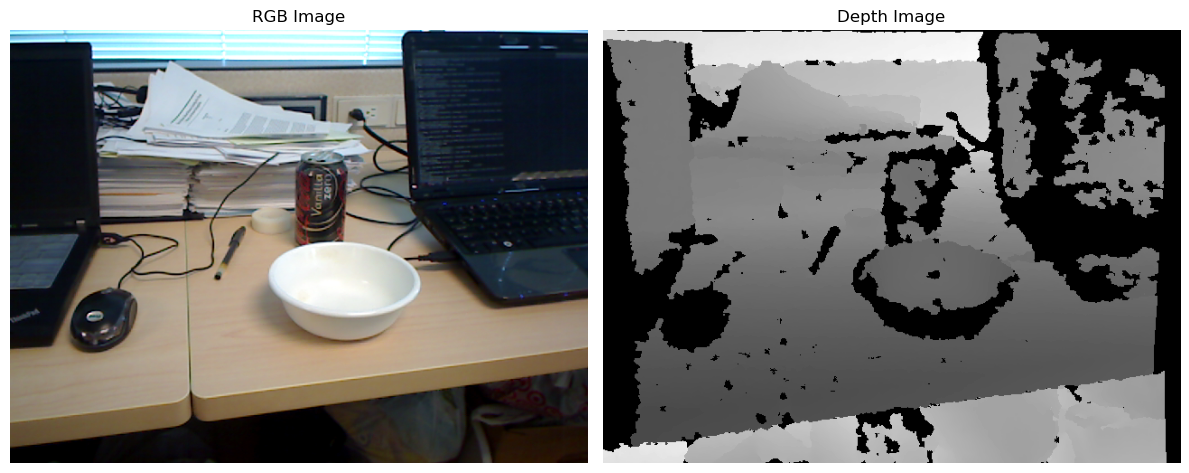

In [5]:
import cv2
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
img_index = 53

base_path = "/home/shashank/Downloads/rgbd-scenes/desk/desk_2"
rgb_file = f"{base_path}/desk_2_{img_index}.png"
depth_file = f"{base_path}/desk_2_{img_index}_depth.png"

rgb_img = cv2.imread(rgb_file) 
depth_img = cv2.imread(depth_file, cv2.IMREAD_UNCHANGED) 

rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("RGB Image")
plt.imshow(rgb_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Depth Image")
plt.imshow(depth_img, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

color_raw = o3d.geometry.Image(rgb_img)
depth_raw = o3d.geometry.Image(depth_img)

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw,
    convert_rgb_to_intensity=False
)

intrinsics = o3d.camera.PinholeCameraIntrinsic(
    o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault
)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image, intrinsics
)

pcd.transform([[1, 0, 0, 0],
               [0, -1, 0, 0],
               [0, 0, -1, 0],
               [0, 0, 0, 1]])

o3d.visualization.draw_geometries([pcd])


In [6]:
print("Running DBSCAN clustering...")
labels = np.array(pcd.cluster_dbscan(eps=0.02, min_points=10, print_progress=True))

max_label = labels.max()
print(f"Detected {max_label + 1} clusters")

colors = np.zeros((len(labels), 3))  # default black

cmap = plt.get_cmap("tab20")
for i in range(max_label + 1):
    colors[labels == i] = cmap(i / (max_label + 1))[:3]

pcd.colors = o3d.utility.Vector3dVector(colors)

o3d.visualization.draw_geometries([pcd])
                            

Running DBSCAN clustering...
Precompute neighbors.[========Detected 11 clusters==>         ] 75%
Precompute neighbors.[========================================] 100%
Clustering[=======================================>] 97%

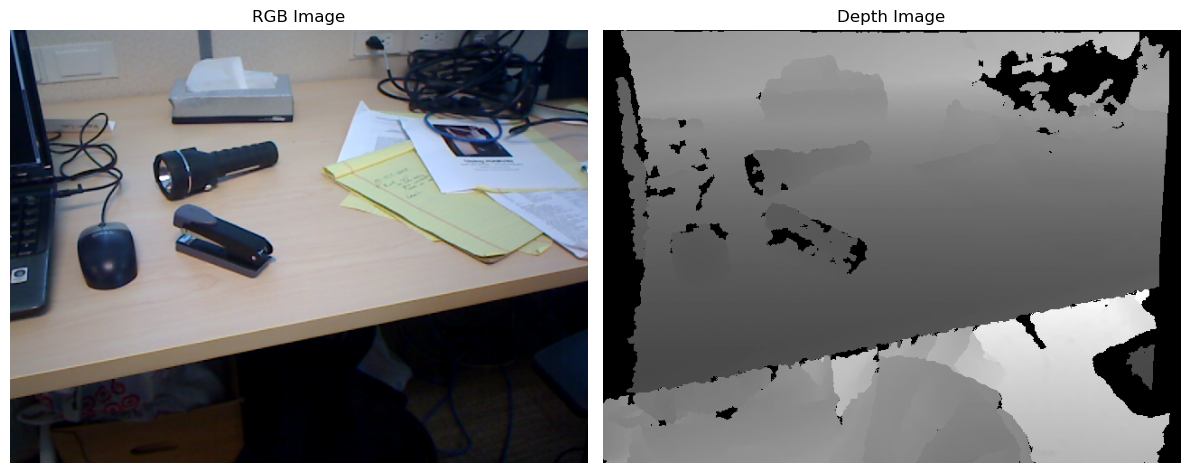

In [7]:
import cv2
import open3d as o3d
import matplotlib.pyplot as plt

# Set image index
img_index = 9

# File paths
base_path = "/home/shashank/Downloads/rgbd-scenes/desk/desk_2"
rgb_file = f"{base_path}/desk_2_{img_index}.png"
depth_file = f"{base_path}/desk_2_{img_index}_depth.png"

rgb_img = cv2.imread(rgb_file) 
depth_img = cv2.imread(depth_file, cv2.IMREAD_UNCHANGED) 

rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("RGB Image")
plt.imshow(rgb_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Depth Image")
plt.imshow(depth_img, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

color_raw = o3d.geometry.Image(rgb_img)
depth_raw = o3d.geometry.Image(depth_img)

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw,
    convert_rgb_to_intensity=False
)

intrinsics = o3d.camera.PinholeCameraIntrinsic(
    o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault
)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image, intrinsics
)

pcd.transform([[1, 0, 0, 0],
               [0, -1, 0, 0],
               [0, 0, -1, 0],
               [0, 0, 0, 1]])

o3d.visualization.draw_geometries([pcd])

In [8]:
print("Running DBSCAN clustering...")
labels = np.array(pcd.cluster_dbscan(eps=0.02, min_points=10, print_progress=True))

max_label = labels.max()
print(f"Detected {max_label + 1} clusters")

colors = np.zeros((len(labels), 3))

cmap = plt.get_cmap("tab20")
for i in range(max_label + 1):
    colors[labels == i] = cmap(i / (max_label + 1))[:3]


pcd.colors = o3d.utility.Vector3dVector(colors)

o3d.visualization.draw_geometries([pcd])

                            

Running DBSCAN clustering...
Precompute neighbors.[========================================] 100%
Detected 17 clusters==============================>] 97%


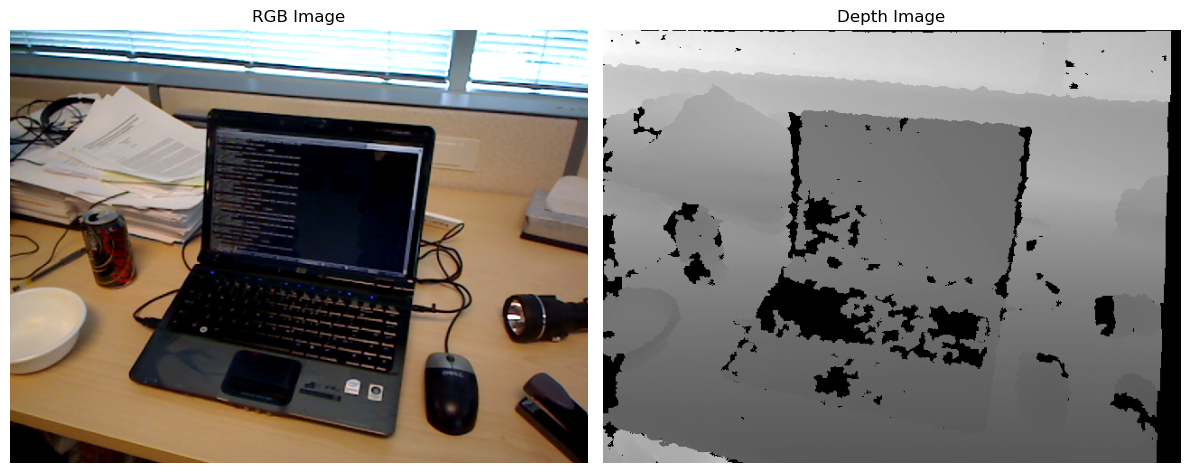

Segmenting the largest plane (e.g., tabletop)...
Plane equation: -0.0045x + 0.8132y + 0.5819z + 0.5424 = 0
Clustering with DBSCAN...
Detected 13 clusters
Precompute neighbors.[========================================] 100%
Clustering[=======================================>] 97%

In [9]:
import cv2
import open3d as o3d
import matplotlib.pyplot as plt

# Set image index
img_index = 24

# File paths
base_path = "/home/shashank/Downloads/rgbd-scenes/desk/desk_2"
rgb_file = f"{base_path}/desk_2_{img_index}.png"
depth_file = f"{base_path}/desk_2_{img_index}_depth.png"

rgb_img = cv2.imread(rgb_file) 
depth_img = cv2.imread(depth_file, cv2.IMREAD_UNCHANGED) 

rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("RGB Image")
plt.imshow(rgb_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Depth Image")
plt.imshow(depth_img, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()

color_raw = o3d.geometry.Image(rgb_img)
depth_raw = o3d.geometry.Image(depth_img)

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw,
    convert_rgb_to_intensity=False
)

intrinsics = o3d.camera.PinholeCameraIntrinsic(
    o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault
)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image, intrinsics
)

pcd.transform([[1, 0, 0, 0],
               [0, -1, 0, 0],
               [0, 0, -1, 0],
               [0, 0, 0, 1]])

o3d.visualization.draw_geometries([pcd])

import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy

# ------------------- PLANE REMOVAL --------------------
def remove_plane(pcd, distance_threshold=0.01, ransac_n=3, num_iterations=1000):
    print("Segmenting the largest plane (e.g., tabletop)...")
    plane_model, inliers = pcd.segment_plane(distance_threshold=distance_threshold,
                                             ransac_n=ransac_n,
                                             num_iterations=num_iterations)
    [a, b, c, d] = plane_model
    print(f"Plane equation: {a:.4f}x + {b:.4f}y + {c:.4f}z + {d:.4f} = 0")

    plane_cloud = pcd.select_by_index(inliers)
    object_cloud = pcd.select_by_index(inliers, invert=True)

    plane_cloud.paint_uniform_color([1, 0, 0])  # Red for table
    return object_cloud, plane_cloud

# ------------------- DBSCAN CLUSTERING --------------------
def color_clusters(pcd, eps=0.05, min_points=10):
    print("Clustering with DBSCAN...")
    labels = np.array(pcd.cluster_dbscan(eps=eps, min_points=min_points, print_progress=True))
    
    n_clusters = labels.max() + 1
    print(f"Detected {n_clusters} clusters")

    colors = plt.get_cmap("tab20")(labels / (n_clusters if n_clusters > 0 else 1))
    colors[labels < 0] = 0  # noise set to black
    pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
    return pcd

# ------------------- Main Execution --------------------
# Assuming you already have your integrated point cloud called `pcd`

# 1. Remove table (RANSAC plane segmentation)
object_cloud, plane_cloud = remove_plane(pcd)

# 2. Apply DBSCAN clustering to remaining objects
clustered_objects = color_clusters(object_cloud)

# 3. Visualize result
o3d.visualization.draw_geometries([plane_cloud, clustered_objects])


In [10]:
import open3d as o3d
import numpy as np

base_path = "/home/shashank/Downloads/rgbd-scenes/desk/desk_2"
start_idx = 19
end_idx = 24
voxel_size = 0.02
max_correspondence_distance_coarse = voxel_size * 15
max_correspondence_distance_fine = voxel_size * 1.5

intrinsic = o3d.camera.PinholeCameraIntrinsic(
    o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)


def load_rgbd(index):
    color = o3d.io.read_image(f"{base_path}/desk_2_{index}.png")
    depth = o3d.io.read_image(f"{base_path}/desk_2_{index}_depth.png")
    return o3d.geometry.RGBDImage.create_from_color_and_depth(
        color, depth, depth_trunc=1.5, convert_rgb_to_intensity=False)

def create_point_cloud(rgbd):
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, intrinsic)
    pcd.estimate_normals()
    return pcd

def pairwise_registration(source, target):
    print("Running pairwise point-to-plane ICP")
    icp_coarse = o3d.pipelines.registration.registration_icp(
        source, target, max_correspondence_distance_coarse, np.identity(4),
        o3d.pipelines.registration.TransformationEstimationPointToPlane())
    
    icp_fine = o3d.pipelines.registration.registration_icp(
        source, target, max_correspondence_distance_fine, icp_coarse.transformation,
        o3d.pipelines.registration.TransformationEstimationPointToPlane())
    
    transformation_icp = icp_fine.transformation
    information_icp = o3d.pipelines.registration.get_information_matrix_from_point_clouds(
        source, target, max_correspondence_distance_fine, transformation_icp)
    
    return transformation_icp, information_icp

def full_registration(pcds):
    pose_graph = o3d.pipelines.registration.PoseGraph()
    odometry = np.identity(4)
    pose_graph.nodes.append(o3d.pipelines.registration.PoseGraphNode(odometry))
    n_pcds = len(pcds)

    for source_id in range(n_pcds):
        for target_id in range(source_id + 1, n_pcds):
            print(f"Registering pair {start_idx + source_id} → {start_idx + target_id}")
            transformation_icp, information_icp = pairwise_registration(
                pcds[source_id], pcds[target_id])

            if target_id == source_id + 1:  # odometry
                odometry = transformation_icp @ odometry
                pose_graph.nodes.append(o3d.pipelines.registration.PoseGraphNode(np.linalg.inv(odometry)))
                pose_graph.edges.append(o3d.pipelines.registration.PoseGraphEdge(
                    source_id, target_id, transformation_icp, information_icp, uncertain=False))
            else:  # loop closure
                pose_graph.edges.append(o3d.pipelines.registration.PoseGraphEdge(
                    source_id, target_id, transformation_icp, information_icp, uncertain=True))

    return pose_graph

def integrate_rgbd_frames(rgbd_images, pose_graph):
    volume = o3d.pipelines.integration.ScalableTSDFVolume(
        voxel_length=voxel_size / 2.0,
        sdf_trunc=0.04,
        color_type=o3d.pipelines.integration.TSDFVolumeColorType.RGB8)

    for i in range(len(rgbd_images)):
        print(f"Integrating frame {start_idx + i}")
        pose = pose_graph.nodes[i].pose
        volume.integrate(rgbd_images[i], intrinsic, np.linalg.inv(pose))

    return volume.extract_point_cloud()



print("Loading RGBD frames...")
rgbd_images = [load_rgbd(i) for i in range(start_idx, end_idx + 1)]
pcds = [create_point_cloud(rgbd) for rgbd in rgbd_images]

print("\nBuilding pose graph using pairwise ICP...")
pose_graph = full_registration(pcds)

print("\nOptimizing pose graph...")
o3d.pipelines.registration.global_optimization(
    pose_graph,
    o3d.pipelines.registration.GlobalOptimizationLevenbergMarquardt(),
    o3d.pipelines.registration.GlobalOptimizationConvergenceCriteria(),
    o3d.pipelines.registration.GlobalOptimizationOption(
        max_correspondence_distance=max_correspondence_distance_fine,
        edge_prune_threshold=0.25,
        reference_node=0))

print("\nIntegrating RGBD frames to create final point cloud...")
pcd_combined = integrate_rgbd_frames(rgbd_images, pose_graph)

o3d.visualization.draw_geometries([pcd_combined])


Loading RGBD frames...

Building pose graph using pairwise ICP...
Registering pair 19 → 20
Running pairwise point-to-plane ICP
Registering pair 19 → 21
Running pairwise point-to-plane ICP
Registering pair 19 → 22
Running pairwise point-to-plane ICP
Registering pair 19 → 23
Running pairwise point-to-plane ICP
Registering pair 19 → 24
Running pairwise point-to-plane ICP
Registering pair 20 → 21
Running pairwise point-to-plane ICP
Registering pair 20 → 22
Running pairwise point-to-plane ICP
Registering pair 20 → 23
Running pairwise point-to-plane ICP
Registering pair 20 → 24
Running pairwise point-to-plane ICP
Registering pair 21 → 22
Running pairwise point-to-plane ICP
Registering pair 21 → 23
Running pairwise point-to-plane ICP
Registering pair 21 → 24
Running pairwise point-to-plane ICP
Registering pair 22 → 23
Running pairwise point-to-plane ICP
Registering pair 22 → 24
Running pairwise point-to-plane ICP
Registering pair 23 → 24
Running pairwise point-to-plane ICP

Optimizing pose gr

In [11]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy


def remove_plane(pcd, distance_threshold=0.01, ransac_n=3, num_iterations=1000):
    print("Segmenting the largest plane (e.g., tabletop)...")
    plane_model, inliers = pcd.segment_plane(distance_threshold=distance_threshold,
                                             ransac_n=ransac_n,
                                             num_iterations=num_iterations)
    [a, b, c, d] = plane_model
    print(f"Plane equation: {a:.4f}x + {b:.4f}y + {c:.4f}z + {d:.4f} = 0")

    plane_cloud = pcd.select_by_index(inliers)
    object_cloud = pcd.select_by_index(inliers, invert=True)

    plane_cloud.paint_uniform_color([1, 0, 0]) 
    return object_cloud, plane_cloud

def color_clusters(pcd, eps=0.05, min_points=10):
    print("Clustering with DBSCAN...")
    labels = np.array(pcd.cluster_dbscan(eps=eps, min_points=min_points, print_progress=True))
    
    n_clusters = labels.max() + 1
    print(f"Detected {n_clusters} clusters")

    colors = plt.get_cmap("tab20")(labels / (n_clusters if n_clusters > 0 else 1))
    colors[labels < 0] = 0  
    pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
    return pcd

object_cloud, plane_cloud = remove_plane(pcd)

clustered_objects = color_clusters(object_cloud)

o3d.visualization.draw_geometries([plane_cloud, clustered_objects])


Segmenting the largest plane (e.g., tabletop)...
Plane equation: -0.0044x + 0.8124y + 0.5831z + 0.5433 = 0
Clustering with DBSCAN...
Precompute neighbors.[================>           Detected 11 clusters
Precompute neighbors.[========================================] 100%
Clustering[=======================================>] 97%